### Data

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# import the data from all sheets of the Excel file

df0 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=0)
df1 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=1)
df2 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=2)
df3 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=3)

# Concatenate all sheets into a single DataFrame
df = pd.concat([df0, df1, df2, df3], ignore_index=True)

### PCA Implementation

In [46]:
# Correct PCA implementation
pca = PCA(n_components=5)

# The wavelength columns are from index 3 to the end
wavelength_data = df.iloc[:, 3:]

# Fit AND transform the data
pca_components = pca.fit_transform(wavelength_data)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Explained variance by PC3: {explained_variance[2]:.2%}")
print(f"Explained variance by PC4: {explained_variance[3]:.2%}")
print(f"Explained variance by PC5: {explained_variance[4]:.2%}")
print(f"Total explained variance: {explained_variance.sum():.2%}")

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

# Add categorical columns for plotting
pca_df['Tratamiento'] = df['Tratamiento'].values
pca_df['Planta'] = df['Planta'].values

# Reorder columns to put Tratamiento and Planta first
pca_df = pca_df[['Tratamiento', 'Planta', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

Explained variance by PC1: 61.88%
Explained variance by PC2: 23.21%
Explained variance by PC3: 9.28%
Explained variance by PC4: 3.00%
Explained variance by PC5: 1.05%
Total explained variance: 98.43%


In [47]:
pca_df.head()

,Tratamiento,Planta,PC1,PC2,PC3,PC4,PC5
0,Control,1,0.013892,-0.303750,-0.002179,-0.160302,-0.141662
1,Control,2,0.273740,-0.365688,0.117677,-0.003298,-0.068207
2,Control,3,0.165994,-0.284036,0.092475,0.010503,-0.005094
3,Control,4,0.087514,-0.638333,0.285837,-0.197233,-0.030718
4,Control,5,-0.288989,-0.621989,0.251955,-0.394174,-0.079278


In [48]:
pca_df.describe()

,Planta,PC1,PC2,PC3,PC4,PC5
count,955.000000,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02
mean,15.425131,-2.976095e-17,2.232071e-17,7.440238e-18,-5.208167e-17,2.976095e-17
std,8.620304,1.157888e+00,7.090934e-01,4.484987e-01,2.548651e-01,1.511649e-01
min,1.000000,-3.173673e+00,-1.361424e+00,-8.695459e+00,-3.372186e+00,-5.203786e-01
25%,8.000000,-5.131602e-01,-3.775769e-01,-1.313336e-01,-1.396887e-01,-9.440493e-02
50%,15.000000,8.420340e-02,-1.337855e-01,-1.673286e-02,3.831710e-03,-4.825707e-03
75%,23.000000,5.700087e-01,2.348732e-01,1.027346e-01,1.490534e-01,8.432491e-02
max,30.000000,6.932086e+00,9.068272e+00,1.879876e+00,7.971381e-01,5.555278e-01


### Data preparation for production of models

In [49]:
# Data preparation for model production
X = df.iloc[:, 3:].values  
y = df['Tratamiento'].values  
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)



# Model 
for the model we still need a clasification algorithm, that classify the data into the treatments based on the PCA components. 
Let's use KNN, SVM and encoders to see which one works better. 

#### KNN

In [50]:
# Define the parameter grid
param_grid = {
    'pca__n_components': [10, 20, 30],            
    'knn__n_neighbors': list(range(1, 12)),          
    'knn__weights': ['uniform', 'distance'],          
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'] 
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),     
    ('pca', PCA()),                   
    ('knn', KNeighborsClassifier())  
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 198 candidates, totalling 990 fits


c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.34925881 0.35625595 0.35741874 0.34925881 0.35625595 0.35741874
 0.3503944  0.35157759 0.3504148  0.34925881 0.35625595 0.35741874
 0.33643411 0.34109207 0.34109207 0.34226846 0.34927241 0.34810962
 0.34339725 0.34222766 0.34339045 0.35505236 0.36087311 0.35971032
 0.35737794 0.35971032 0.35854753 0.36318509 0.37250782 0.37250782
 0.35969672 0.36322589 0.36438868 0.37249422 0.37717938 0.37717938
 0.36094111 0.36908065 0.37025024 0.36670747 0.37369101 0.37252822
 0.37953216 0.3876853  0.38884809 0.36437508 0.37369781 0.3748606
 0.38299334 0.38302054 0.38185775 0.37597579 0.38182375 0.37949816
 0.37715898 0.37952536 0.38068815 0.38064735 0.39232286 0.39465524
 0.36438188 0.3620699  0.36672107 0.37249422 0.38298654 0.38414933
 0.35966952        nan        nan 0.35966952 0.37367061 0.38415613
 0.34575003        nan 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': [10, 20, 30]},
             verbose=1)

In [51]:
print(f"Best cross-validation score (Accuracy): {grid_search.best_score_:.4f}")
print("Best parameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"\nAccuracy on the test set: {accuracy:.4f}")

y_pred = best_model.predict(X_test)

Best cross-validation score (Accuracy): 0.4412
Best parameters found:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 8, 'knn__weights': 'distance', 'pca__n_components': 30}

Accuracy on the test set: 0.4062


<Figure size 1600x1200 with 0 Axes>

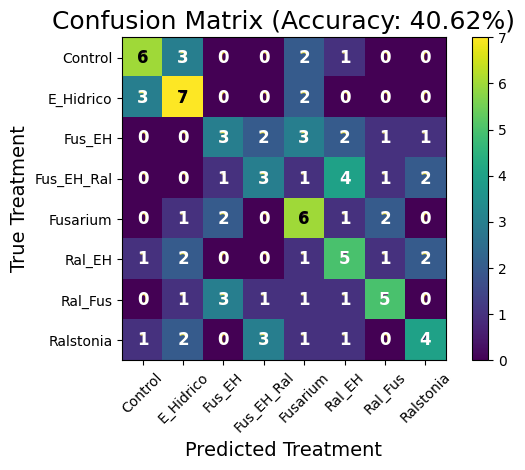

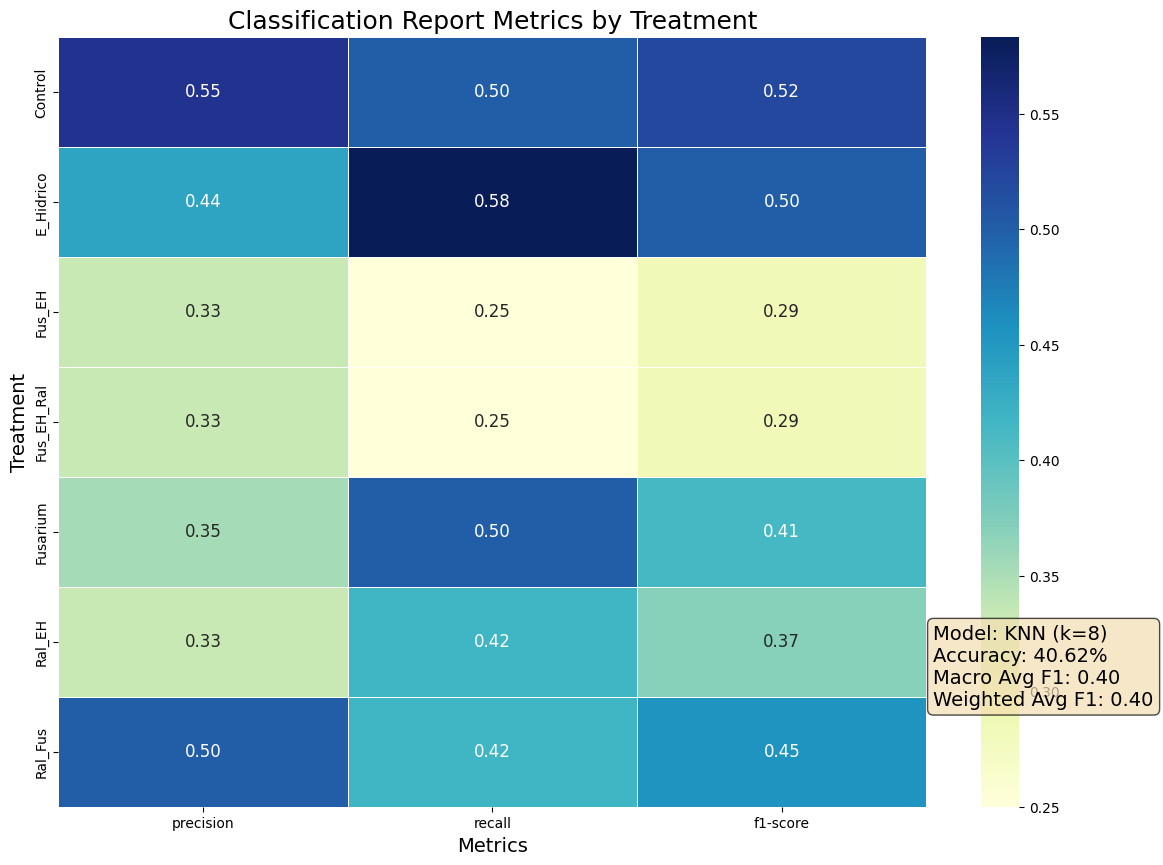

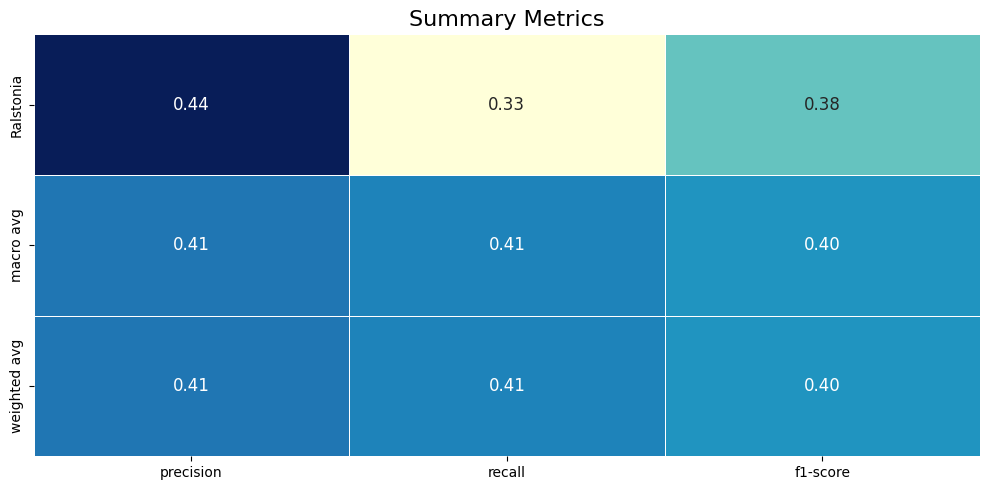

Overall model accuracy: 40.62%

Classification Report:
              precision    recall  f1-score   support

     Control       0.55      0.50      0.52        12
   E_Hidrico       0.44      0.58      0.50        12
      Fus_EH       0.33      0.25      0.29        12
  Fus_EH_Ral       0.33      0.25      0.29        12
    Fusarium       0.35      0.50      0.41        12
      Ral_EH       0.33      0.42      0.37        12
     Ral_Fus       0.50      0.42      0.45        12
   Ralstonia       0.44      0.33      0.38        12

    accuracy                           0.41        96
   macro avg       0.41      0.41      0.40        96
weighted avg       0.41      0.41      0.40        96



In [52]:
# ---------- PLOT 1: CONFUSION MATRIX ----------
plt.figure(figsize=(16, 12))

# Enhanced confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
labels = sorted(df['Tratamiento'].unique())

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='viridis', colorbar=True, xticks_rotation=45)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=18)
plt.xlabel('Predicted Treatment', fontsize=14)
plt.ylabel('True Treatment', fontsize=14)

# Add value annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text_color = 'white' if plt.cm.viridis(cm[i, j]/cm.max())[0] < 0.5 else 'black'
        plt.text(j, i, cm[i, j], ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------- PLOT 2: CLASSIFICATION REPORT ----------
plt.figure(figsize=(14, 10))

# Enhanced classification report visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T
report_df = report_df.drop('accuracy', errors='ignore')  # Remove the accuracy row

# Create heatmap for classification metrics
ax = sns.heatmap(report_df.iloc[:-3, :3], annot=True, cmap='YlGnBu', fmt='.2f', 
        linewidths=0.5, cbar=True, annot_kws={"size": 12})
plt.title('Classification Report Metrics by Treatment', fontsize=18)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Treatment', fontsize=14)

# Add a text box with overall model performance
props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
textstr = (f'Model: KNN (k={grid_search.best_params_["knn__n_neighbors"]})\n'
           f'Accuracy: {accuracy:.2%}\n'
           f'Macro Avg F1: {report["macro avg"]["f1-score"]:.2f}\n'
           f'Weighted Avg F1: {report["weighted avg"]["f1-score"]:.2f}')
plt.gcf().text(0.75, 0.25, textstr, fontsize=14,
        verticalalignment='center', bbox=props)

# Add the summary metrics at the bottom
summary_df = report_df.iloc[-3:, :3]
plt.figure(figsize=(10, 5))
sns.heatmap(summary_df, annot=True, cmap='YlGnBu', fmt='.2f',
           linewidths=0.5, cbar=False, annot_kws={"size": 12})
plt.title('Summary Metrics', fontsize=16)

plt.tight_layout()
plt.show()

# Print additional performance details
print(f"Overall model accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### SVM